# Математические пакеты. Лабораторная работа 1: Основы ЦОС
Выполнил студент группы 9381 Птичкин Сергей.
### Вариант №14

## Цель работы
Изучить возможности библиотек Python для решения цифровых задач обработки сигналов.

## Задачи
1. Освоить Jupyter Notebook.
2. Выполнить загрузку аудио сигнала и построить огибающую (график).
3. Фильтрация (выбрать один из 4 типов фильтров). Получить фильтрованный сигнал.
4. Детектор сигнал/шум. Получить сигнал после детектирования.
5. Эффект "Эхо". Получить сигнал после работы аудио-эффекта.
6. Бонусное задание: эффект Distortion (классический вариант). Получить сигнал после работы аудио-эффекта.
## Теоретические положения
### Фильтрация
Имеется сигнал $x(i),i=0,1,...,N-1$. Хотим построить огибающую $y(j),j=0,1,...,n-1$.
Пусть $m=[{N\over n}]$ - число точек в интервале усреднения (порядок фильтра). Тогда $y(j)={1\over m}\sum\limits_{k=mj}^{mj+m-1}|x(k)|$.
Основные типы фильтров: нижних частот (ФНЧ), верхних частот (ФВЧ), полосовой (ПФ), режекторный (РФ).

Фильтр нижних частот (ФНЧ) — эффективно пропускает частотный спектр сигнала ниже некоторой частоты (частоты среза) и подавляет частоты сигнала выше этой частоты. От нулевой частоты до частоты среза ФНЧ находится полоса частот пропускания, справа - полоса частот подавления.
Фильтр верхних частот (ФВЧ) - пропускает высокие частоты входного сигнала, при этом подавляя частоты сигнала ниже частоты среза.
Полосовой фильтр (ПФ) - пропускает составляющие, находящиеся в некоторой полосе частот.
Режекторный фильтр (РФ) - не пропускающий колебания некоторой определённой полосы частот и пропускающий колебания с частотами, выходящими за пределы этой полосы.

### Пример ФНЧ фильтрации
Пусть $F_d$ - частота дискретизации, $F_s$ - частота среза, $m$ - порядок фильтра. Тогда вычисляем: $wn=2{F_s\over F_d}$, где $wn$ - относительная частота среза.

### Амплитудный детектор сигнал/шум
Определяем среднее сигнала по амплитуде (без учёта знака): $mid={{\sum\limits_{k=0}^{N-1}{|x(k)|}}\over N}$
Определяем порог детектора - $Th=\alpha * mid$, где $0&lt;\alpha&lt;1$ подбирается экспериментально. Задаём величину "провала" (в отсчётах) - $k$. Обозначим $y(i)$ - сигнал после детектирования.

Событие "начало сигнала". Если $x(i)$ в течение $k$ отсчётов превышает порог, $y(i)=x(i)$,
Событие "окончание сигнала". Если $x(i)$ в течение $k$ отсчётов меньше порога, $y(i)=0$

### Эхо (простейший ревербератор)
Ревербератор реализован, как набор линий задержки. Число линий задержки $N_L&gt;8$. Каждая линия задержки имеет свой весовой коэффициент (задается пользователем): $\alpha_1 &gt; \alpha_2 &gt; ... &gt; \alpha_{N_L}$
Перед добавлением к исходному сигналу, выход ревербератора фильтруется ФНЧ-фильтром первого порядка.
Желаемое соотношение между ”сухим”и обработанным сигналом задается коэффициентом применимости $\gamma$.

Ревербератор может работать в двух режимах: ручной и с использованием готовой конфигурации (preset). Для ручного режима регулируется пользователем задается максимальная задержка $D_1$, а величины остальных определяются автоматически через нее:
$D_i = D_{1}2{{1-i}\over N_L}, i=2,...,N_L$.
Для готовой конфигурации пользователь вручную задает последовательность $D_1 &gt; D_2 &gt; ... &gt; D_{N_L}$.

Начальное значение $D_1$ определяется геометрией помещения, и является расстоянием, пройденным звуком (скорость 335 м/сек) от точки излучения до ближайшего препятствия.

Пример: Допустим, частота дискретизации сигнала 48000 Гц, до ближайшей стены — 10 метров. Звук пройдет это расстояние за ${10\over 335} =$ 0.02985 секунд. Тогда задержка $D_1$ составит 48000 ∗ 0.02985 = 1433 отсчета сигнала.

### Классический Distortion
Обозначим входной сигнал и выходной сигналы, соответственно как $x(i)$ и $y(i), i = 0,1, . . . ,N − 1$. Пользователь задает порог— $Th$ и максимальное значение сигнала $Max &gt; Th$. Тогда
$$\begin{equation*}
Y(i) = 
 \begin{cases}
   x(i) &amp;\text{$|x(i)|\leq Th$}\\
   Max * sign(x(i)) &amp;\text{$|x(i)|&gt;Th$}
 \end{cases}
\end{equation*}$$

## Выполнение работы.
#### Построение огибающей.

/tmp/ipykernel_308/169514900.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sample = np.fromstring(content, dtype=types[sampwidth])


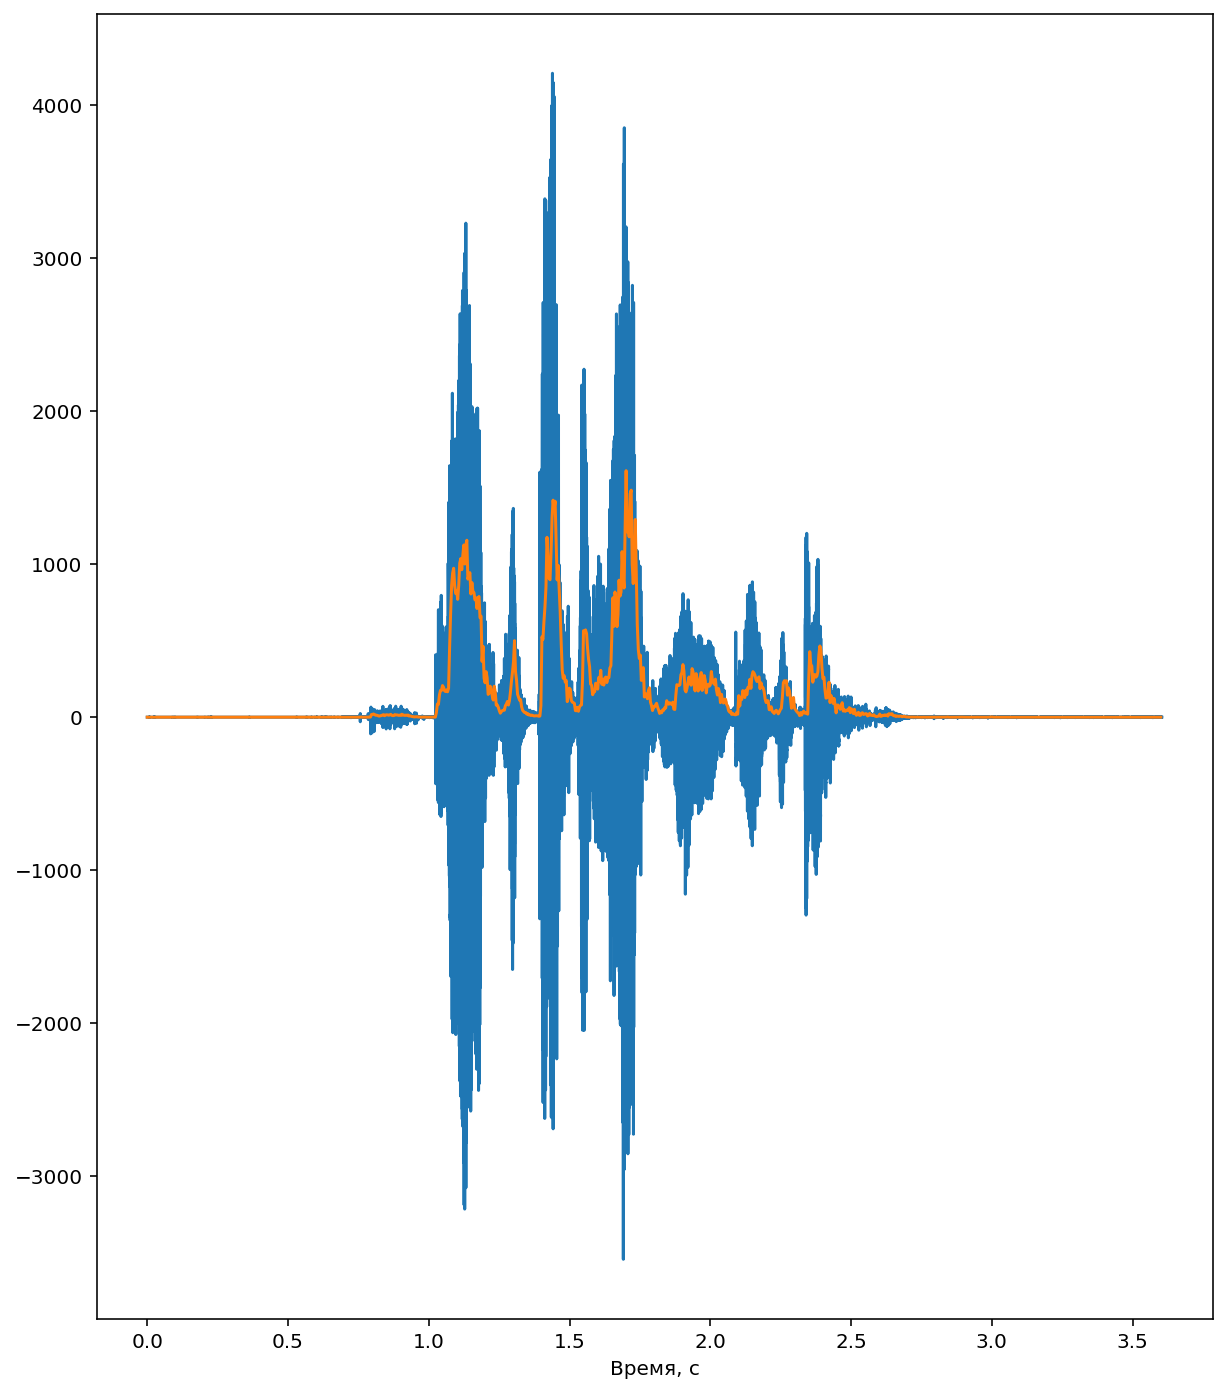

In [2]:
import wave
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import math
from scipy.io import wavfile
from scipy import signal

file_name = "03-01-05-01-01-01-14_A14.wav"
ipd.Audio(file_name)

wav = wave.open(file_name, mode="r")
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav.getparams()
content = wav.readframes(nframes)
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}
sample = np.fromstring(content, dtype=types[sampwidth])
time = nframes / framerate
time_distribution = np.linspace(0, len(sample) / framerate, num=len(sample))

N = len(sample)
n = 1000
m = math.floor(N/n) #Количество точек усреднения
y = [] #огибающая
for j in range(0, n):
    sum = 0
    for k in range(m*j, m*j+m-1):
        sum+= abs(sample[k])
    y.append(sum/m)
plt.figure(figsize=(10, 12))
plt.xlabel("Время, с")
plt.plot(time_distribution, sample)
y_distribution = np.linspace(0, 3.6, num=len(y))
plt.plot(y_distribution, y)

#### Фильтрация

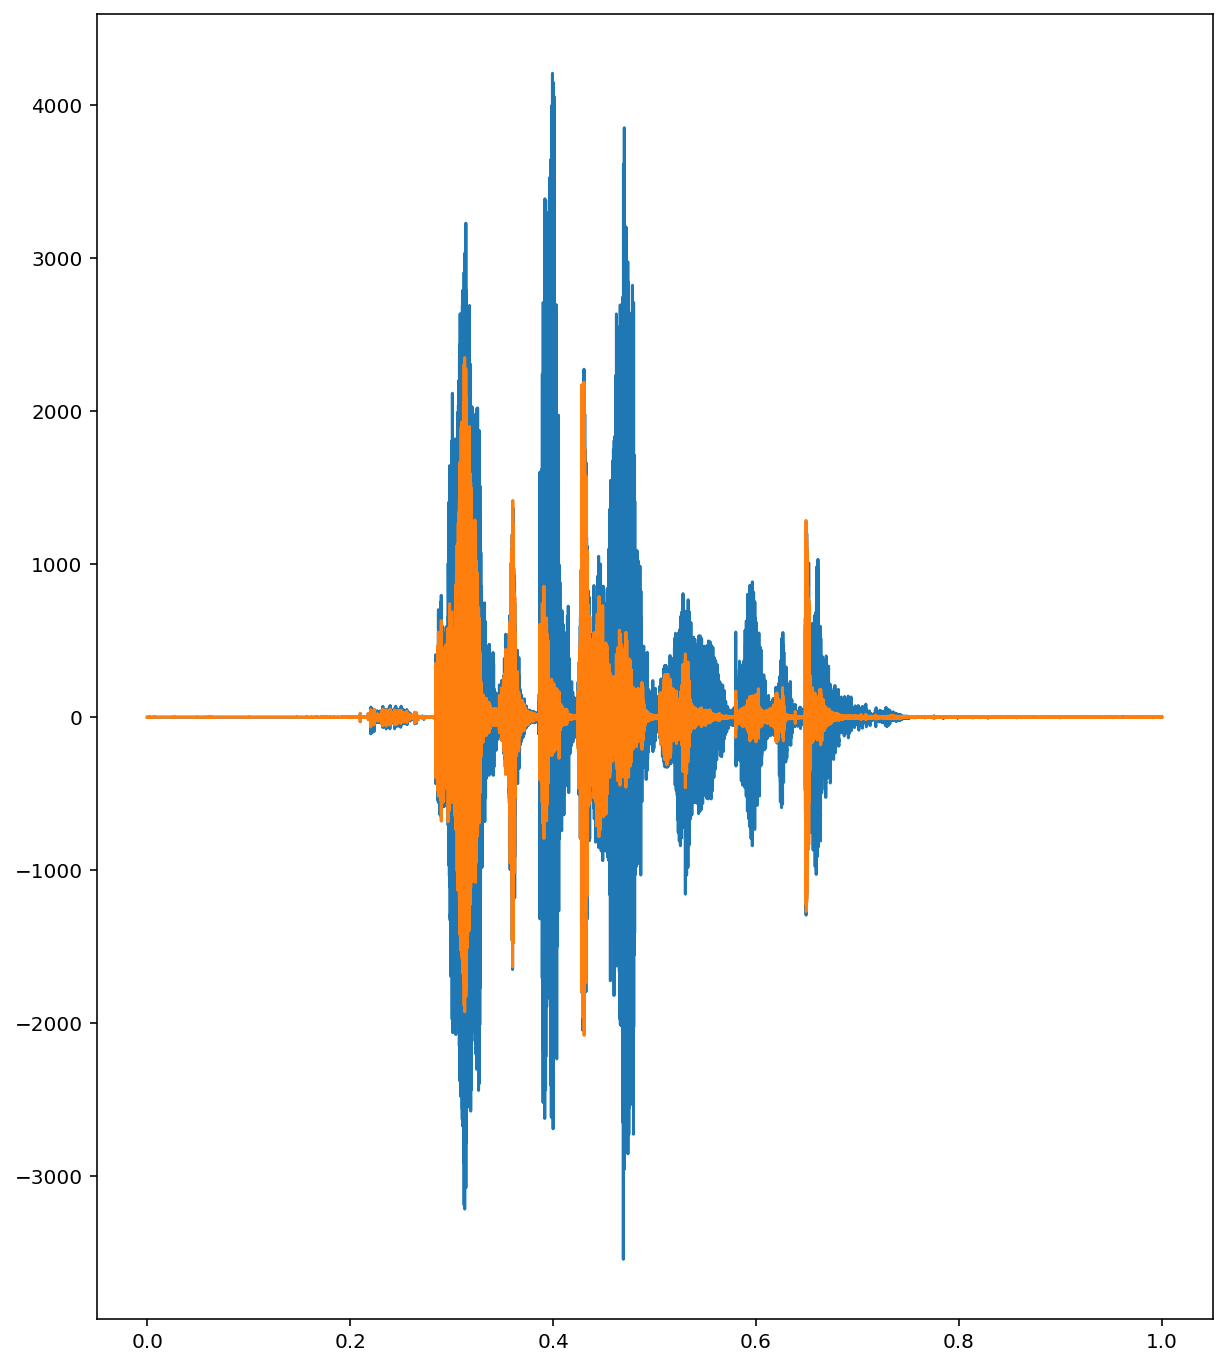

In [3]:
Fs = 3000  #Частота среза
m = 5 #Порядок фильтрации
wn = 2 * (Fs / framerate)
b, a = signal.butter(5, wn, "highpass") #Выбираем фильтр высоких частот(ФВЧ)
filted_sample = signal.filtfilt(b, a, sample) #Отфильтрованный сигнал
distribution = np.linspace(0,1,len(sample))
plt.figure(figsize=(10, 12))
plt.plot(distribution, sample)
plt.plot(distribution, filted_sample)
write_sample = np.asarray(filted_sample, dtype=types[sampwidth])
wavfile.write("res_filtr.wav", framerate, write_sample)
ipd.Audio("res_filtr.wav")

#### Детектор сигнал/шум

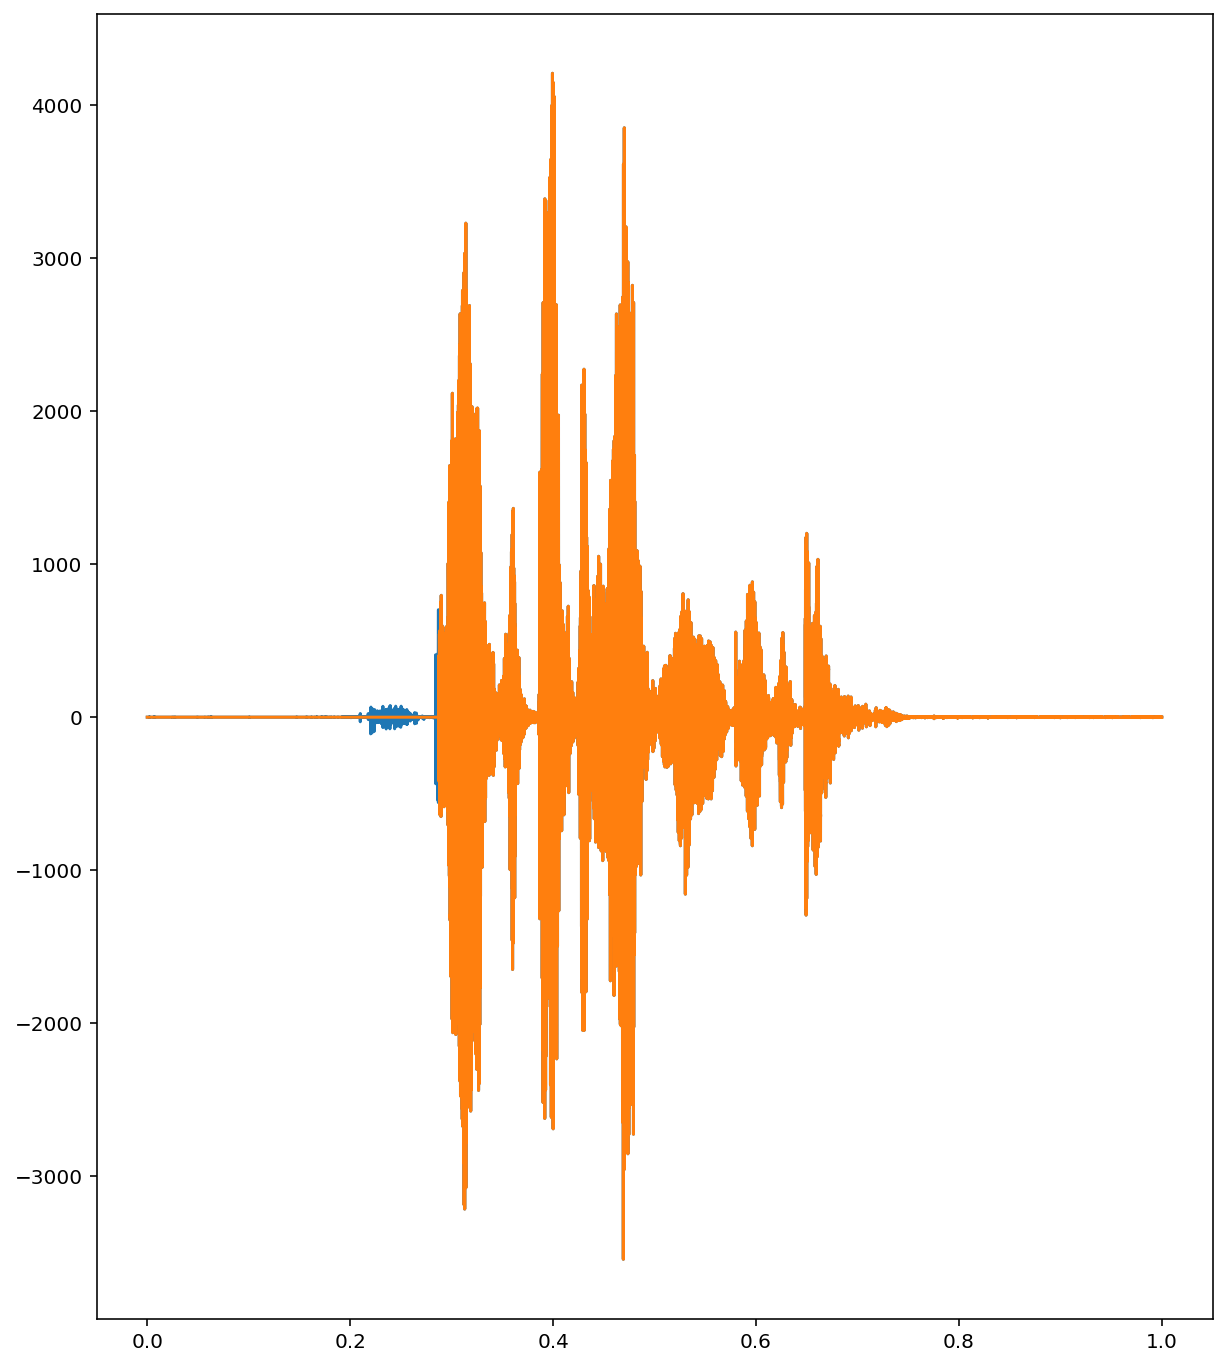

In [4]:
N = len(sample)
mid = 0
for k in range(0, N):
    mid+= abs(sample[k])
mid/=N #среднее сигнала по амплитуде
alpha = 0.7
Th = alpha*mid #Порог детектора
k = 10 #Величина провала (в отсчётах)

signal_count = 0
no_signal_count = 0
is_record = 0   #флаг записи
y = []
for i in range(N):
    if abs(sample[i]) > Th:
        signal_count += 1
        no_signal_count = 0
    else:
        signal_count += 1
        signal_count = 0

    if signal_count == k: #смена режима при k значениях подряд
        is_record = 1
    if no_signal_count == k: #прекращение записи
        is_record = 0

    if is_record == 1:
        y.append(sample[i])
    else:
        y.append(0)

distribution = np.linspace(0,1,len(sample))
plt.figure(figsize=(10, 12))
plt.plot(distribution, sample)
plt.plot(distribution, y)
y = np.asarray(y, dtype=types[sampwidth])
wavfile.write("res_detect.wav", framerate, y)
ipd.Audio("res_detect.wav")

#### Эхо (простейший ревербератор)

In [5]:
N = len(sample)
NL = 9 #Число линий задержки
gamma = 0.95 #коэффициент применимости
v = 335 #м/с - скорость звука
D = [0]*NL #Линии задержки
D[0] = 15/v #максимальная задержка
alpha = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1] #Весовые коэффициенты линий задержки

for i in range(1, NL):
    D[i] = D[0] * (2 ** ((-i)/NL))

process_sample = [0]*(int((np.sum(D) + N / framerate + 1) * framerate))
for i in range(N-1):
    n = 0
    for j in range(NL):
        n+=D[j]
        process_sample[i+int(n*framerate)] += sample[i] * alpha[j]

# Применение к полученному сигналу ФНЧ
Fs = 1000
wn = 2 * Fs / framerate
m = 1
b, a = signal.butter(m, wn, "lowpass")
echo_sample = signal.filtfilt(b, a, process_sample)*gamma

for i in range(N):
    echo_sample[i]+=sample[i]

echo_sample = np.asarray(echo_sample, dtype=types[sampwidth])
wavfile.write("res_echo.wav", framerate, echo_sample)
ipd.Audio("res_echo.wav")

#### Классический Distortion

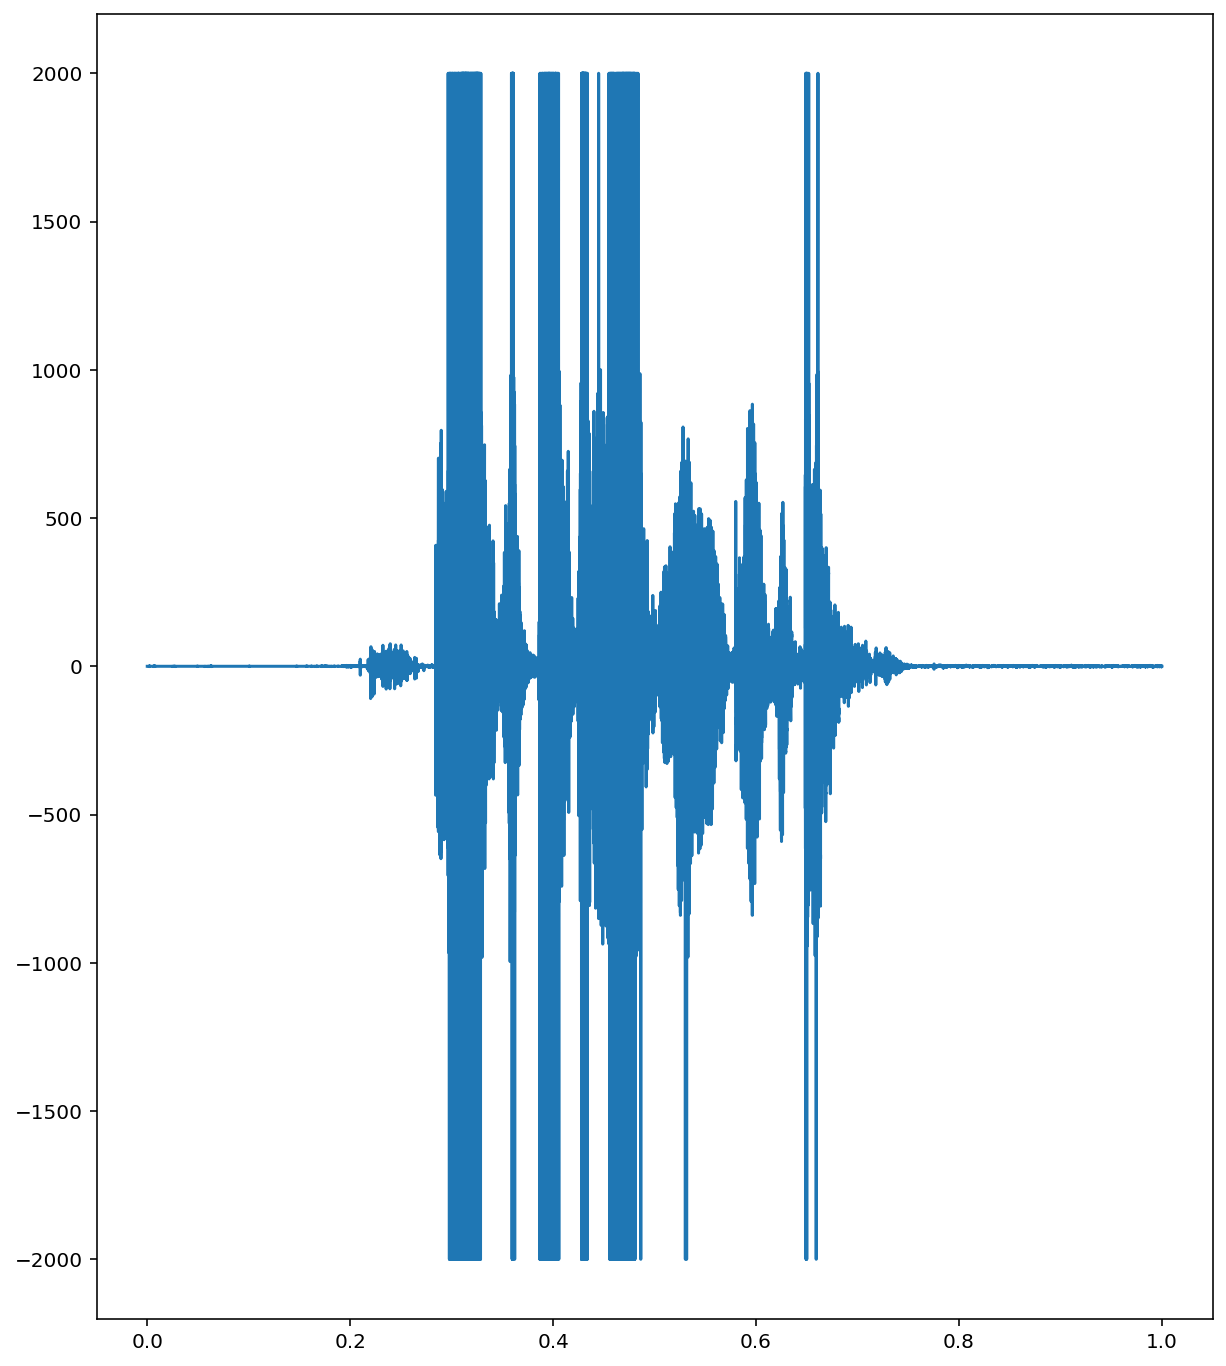

In [6]:
Th = 1000 #Порог
MAX = 2000 #Максимальное значение сигнала
Y = []

for i in range(0, N):
    if(abs(sample[i])>Th):
        Y.append(MAX * np.sign(sample[i]))
    else:
        Y.append(sample[i])

distribution = np.linspace(0,1,N)
plt.figure(figsize=(10, 12))
plt.plot(distribution, Y)

Y = np.asarray(Y, dtype=types[sampwidth])
wavfile.write("res_dist.wav", framerate, Y)
ipd.Audio("res_dist.wav")

## Вывод
В ходе выполнения лабораторной работы были изучены и освоены некоторые способы обработки цифровых сигналов. Получен опыт в работе с Jupyter Notebook и различными библиотеками для работы с аудиофайлами.